<Axes: >

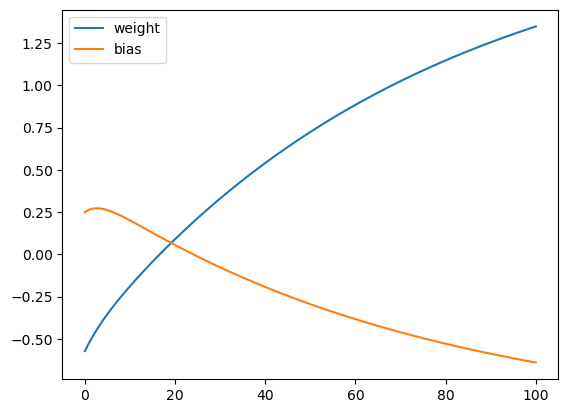

In [1]:
import pandas as pd
import torch

torch.manual_seed(42)
X = torch.rand(100, 1)
y = 2 * X - 1

model = torch.nn.Linear(1, 1)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

num_epochs = 100

stats_loss = []
stats_params = {"weight": [model.weight.item()], "bias": [model.bias.item()]}

for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X)
    loss = criterion(outputs, y)
    stats_loss.append(loss.detach().item())

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    stats_params["weight"].append(model.weight.item())
    stats_params["bias"].append(model.bias.item())

pd.DataFrame(stats_params).plot()

In [2]:
pd.DataFrame(stats_params)

,weight,bias
0,-0.572670,0.249804
1,-0.520505,0.265255
2,-0.473606,0.272234
3,-0.430728,0.272979
4,-0.390946,0.269152
...,...,...
96,1.313212,-0.620361
97,1.322392,-0.625435
98,1.331450,-0.630442
99,1.340387,-0.635382
